Importing necessary packages:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import drive                       #This is to import the datasets which are uploaded to Google drive
drive.mount('/content/drive')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


Mounted at /content/drive


Loading testing and training data:

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/House prices prediction dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/House prices prediction dataset/test.csv')

The Saleprice column is only present in training data and not the test data for which it will be predicted later on.

Inspecting data, column types and rows:

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So, we have a total of 81 columns/features inlcuding the SalePrice column

In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
numerical_features = train_df.select_dtypes(exclude=['object']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns


In [8]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are a mix of categorical and numerical features to work with.

### **Exploratory Data Abalysis (EDA):**

In [10]:
train_df[numerical_features].isnull().any()

,0
Id,False
MSSubClass,False
LotFrontage,True
LotArea,False
OverallQual,False
OverallCond,False
YearBuilt,False
YearRemodAdd,False
MasVnrArea,True
BsmtFinSF1,False


In [11]:
train_df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0


'LotFrontage', 'GarageYrBlt' and 'MasVnrArea' columns have significantly higher null values. We need to decide what to do about them.

As per the data_description file that was packaged along with the datasets from Kaggle, following are the descriptions of a few column features which have higher number of null values:

1. LotFrontage - Linear feet of street connected to property
2. GarageYrBlt - Year garage was built
3. MasVnrArea: Masonry veneer area in square feet


In [12]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())




So, we have replaced the null values in these columns with the mean of all values in that column.

In [13]:
train_df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


For the rest of the missing value rows, if any, in the training or test data, we will drop them as they are lesser frequent in the dataset and will not lead to huge data loss. This step will be done later on after we are done handling null values in categorical features.

In [14]:
train_df[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


The categorical features with significantly higher null values are described, as follows:

1. Alley: Type of alley access to property
2. MasVnrType: Masonry veneer type
3. BsmtQual: Evaluates the height of the basement
4. BsmtCond: Evaluates the general condition of the basement
5. BsmtExposure: Refers to walkout or garden level walls
6. BsmtFinType1: Rating of basement finished area
7. BsmtFinType2: Rating of basement finished area
8. Electrical: Electrical system
9. KitchenQual: Kitchen quality
10. Functional: Home functionality
11. FireplaceQu: Number of fireplaces
12. GarageType: Garage location
13. GarageFinish: Interior finish of the garage
14. GarageQual: Garage quality
15. GarageCond: Garage condition
16. PoolQC: Pool quality
17. Fence: Fence quality

Certain columns have a lot of null values -

PoolQC: 2909, Fence: 2348, MiscFeature: 2814, Alley: 2721, MasVnrType: 1766,FireplaceQU: 1420.

Removing these columns entirely will be an intelligent decision as they wont be able to provide a lot of data anyways and will not affect our model substantially. Also, it may be noted that we are removing columns here and not rows. So, other columns are not affected and so we are not losing on any important data that might affect our model's predictions.

In [15]:
train_df.drop(['PoolQC','Fence','MiscFeature','Alley','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [16]:
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'object']
train_df[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


At this point, we have an option of either removing the columns containing null values entirely or we can impute values in these columns to replace the null values.

<Axes: xlabel='GarageType'>

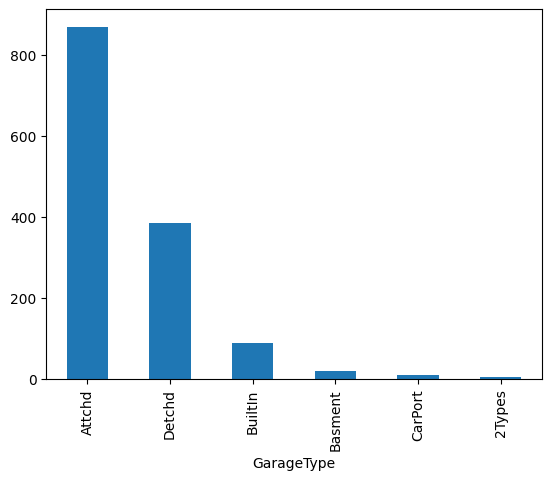

In [17]:
train_df['GarageType'].value_counts().plot(kind='bar')

In the GarageType feature, the most frequent value is 'Attchd'. It'll make sense to impute this modal value into the null values to make a representative dataset.

In [18]:
train_df['GarageType'] = train_df['GarageType'].fillna('Attchd')

In [19]:
train_df[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


An easier way to do this is to calculate the mode of categorical features and impute it in the null values of that feature. Repeating this exercise for the features with null values more than 50 should lead to a sound result. For features with null values less than 50, we will drop the rows as it will not lead to big data loss.

In [20]:
#Imputing modal values in columns with categoical features having more than 50 null values:

train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode().values[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode().values[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode().values[0])
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode().values[0])
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode().values[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode().values[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode().values[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode().values[0])

In [21]:
train_df[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [22]:
#Dropping all remaning rows with null values
#This includes rows of columns containing less than 50 null values for both numerical features and categorical features

train_df.dropna(axis=0,inplace=True)

In [23]:
train_df[categorical_features].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [24]:
train_df[numerical_features].isnull().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


In [25]:
train_df.shape

(1459, 75)

So, now, all null values have been intelligently taken care of.

**Handling Null values in numerical and categorical data in test data:**

In [26]:
#Repeating similar procedure, as carried out above, for test data:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())


test_df.drop(['PoolQC','Fence','MiscFeature','Alley','MasVnrType','FireplaceQu'],axis=1,inplace=True)


test_df['GarageType'] = test_df['GarageType'].fillna('Attchd')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode().values[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode().values[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode().values[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode().values[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode().values[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode().values[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode().values[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode().values[0])


test_df.dropna(axis=0,inplace=True)

In [27]:
#checking for null values in categorical features
test_df[categorical_features].isnull().any()

,0
MSZoning,False
Street,False
LotShape,False
LandContour,False
Utilities,False
LotConfig,False
LandSlope,False
Neighborhood,False
Condition1,False
Condition2,False


In [28]:
#checking for null values in categorical features

#The following step is important as Saleprice column is not present in Test data as it is the target variable
numerical_features_test_df = [col for col in test_df.columns if test_df[col].dtype != 'object']

test_df[numerical_features_test_df].isnull().sum()


,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


In [29]:
test_df.shape

(1447, 74)

### **Feature Scaling and Encoding:**

Feature scaling is performed on numerical features to bring them to a similar scale of values. This leads to optimization and lesser runtime for Linear Regression and/or other Machine Learning algorithms which uses Gradient Descent to converge to a solution. Also, for categorical features, we will be encoding the values to bring all values into numerics.

In [30]:
#Determine range of values across numerical features/columns

train_df[numerical_features].max() - train_df[numerical_features].min()

,0
Id,1459.0
MSSubClass,170.0
LotFrontage,292.0
LotArea,213945.0
OverallQual,9.0
OverallCond,8.0
YearBuilt,138.0
YearRemodAdd,60.0
MasVnrArea,1600.0
BsmtFinSF1,5644.0


The range of values varies a lot among the numerical features. It is better to scale them.

Let's apply Mean normalization to all numerical features to scale them. We calculate the mean values of all numerical features first.

In [31]:
train_df[numerical_features].mean()

,0
Id,730.054832
MSSubClass,56.881426
LotFrontage,70.047936
LotArea,10517.363948
OverallQual,6.100069
OverallCond,5.575737
YearBuilt,1971.244003
YearRemodAdd,1984.850583
MasVnrArea,103.756328
BsmtFinSF1,443.943797


The mathematical formula for mean normalization is (X - U)/(max - min) where U=mean and max and min are maximum and minimum values in a particular column.

In [32]:
train_df_numerical_features_normalized = (train_df[numerical_features] - train_df[numerical_features].mean()) / (train_df[numerical_features].max() - train_df[numerical_features].min())

In [33]:
train_df_numerical_features_normalized

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-0.499695,0.018345,-0.017287,-0.009663,0.099992,-0.071967,0.230116,0.302490,0.057652,0.046431,...,-0.109966,0.026157,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,-0.392984,0.046093,0.038286
1,-0.499009,-0.216950,0.034082,-0.004288,-0.011119,0.303033,0.034464,-0.147510,-0.064848,0.094624,...,0.237759,-0.085361,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,-0.120257,-0.203907,0.000791
2,-0.498324,0.018345,-0.007013,0.003424,0.099992,-0.071967,0.215623,0.285824,0.036402,0.007451,...,-0.109966,-0.008578,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,0.243380,0.046093,0.059116
3,-0.497639,0.077168,-0.034411,-0.004522,0.099992,-0.071967,-0.407565,-0.247510,-0.064848,-0.040387,...,-0.109966,-0.021375,0.452954,-0.006716,-0.031399,-0.003741,-0.002808,-0.392984,-0.453907,-0.056840
4,-0.496953,0.018345,0.047781,0.017493,0.211103,-0.071967,0.208377,0.252490,0.153902,0.037395,...,0.114072,0.068204,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,0.516107,0.046093,0.095917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.497564,0.018345,-0.027561,-0.012154,-0.011119,-0.071967,0.201130,0.252490,-0.064848,-0.078658,...,-0.109966,-0.012234,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,0.152471,-0.203907,-0.008236
1456,0.498249,-0.216950,0.051206,0.012422,-0.011119,0.053033,0.048957,0.052490,0.009527,0.061314,...,0.297269,-0.085361,-0.039799,-0.006716,-0.031399,-0.003741,-0.002808,-0.392984,0.546093,0.040369
1457,0.498934,0.077168,-0.013863,-0.006896,0.099992,0.428033,-0.219159,0.352490,-0.064848,-0.029933,...,-0.109966,0.024329,-0.039799,-0.006716,-0.031399,-0.003741,0.158483,-0.120257,0.546093,0.118830
1458,0.499620,-0.216950,-0.007013,-0.003741,-0.122230,0.053033,-0.153942,0.185824,-0.064848,-0.069976,...,0.317106,-0.085361,0.163099,-0.006716,-0.031399,-0.003741,-0.002808,-0.211166,0.546093,-0.053889


As can be seen above, all numerical features are now scaled between -1 and 1 after applying mean normalization. We could have used other techniques to normalise the features like z-score normalization or dividing by maximum values in a column.

**Encoding categorical features:**

In [34]:
for i in categorical_features:
  print (f"{i} = {train_df[i].unique()}")

MSZoning = ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street = ['Pave' 'Grvl']
LotShape = ['Reg' 'IR1' 'IR2' 'IR3']
LandContour = ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities = ['AllPub' 'NoSeWa']
LotConfig = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope = ['Gtl' 'Mod' 'Sev']
Neighborhood = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 = ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType = ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle = ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle = ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl = ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st = ['VinylSd' 'Meta

After going through the data description file packaged with the datasets, it was found out that the only ordinal categorical variables among all the categorical features are the following:

1. ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

2. BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (greater than 70 inches)
       NA	No Basement

3. BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
4. BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

5. BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

6. BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

7. HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

8. KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

9. FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

10. GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

11. GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

12. GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

13. PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

14. PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

The above categorical features can be ordinally encoded using sklearn. Out of these 14 features, two features ('FireplaceQU' and 'PoolQC') have already been removed before as they had significantly high null values.

Rest of the categorical features will be one hot encoded to convert them into numerics.

In [35]:
#Ordinal encoding using sklearn
from sklearn.preprocessing import OrdinalEncoder

ordinal_columns = ['ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond','PavedDrive']
ordinal_categories = [
    ['Ex','Gd','TA','Fa','Po'],
    ['Ex','Gd','TA','Fa','Po','NA'],
    ['Ex','Gd','TA','Fa','Po','NA'],
    ['Gd','Av','Mn','No','NA'],
    ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
    ['Ex','Gd','TA','Fa','Po'],
    ['Ex','Gd','TA','Fa','Po'],
    ['Fin','RFn','Unf','NA'],
    ['Ex','Gd','TA','Fa','Po','NA'],
    ['Ex','Gd','TA','Fa','Po','NA'],
    ['Y','P','N']
]

oridnal_encoder = OrdinalEncoder(categories=ordinal_categories)

train_df[ordinal_columns] = oridnal_encoder.fit_transform(train_df[ordinal_columns])

train_df[ordinal_columns].head()

,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,PavedDrive
0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,1.0,2.0,2.0,0.0
1,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,1.0,2.0,2.0,0.0
2,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,1.0,2.0,2.0,0.0
3,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,2.0,2.0,2.0,0.0
4,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,2.0,2.0,0.0


So, the ordinal columns have been numerically encoded. Now, we will one hot encode the remaining categorical columns that are not ordinal i.e. nominal columns.

In [36]:
nominal_columns = [x for x in categorical_features if x not in ordinal_columns]

train_df[nominal_columns].info()


<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  Foundation     1459 non-null   object
 18  Heating        1459 non-null   ob

In [37]:
from re import IGNORECASE
#One Hot Encoding encoding using sklearn
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
onehotencodedcolumns_train_df = onehotencoder.fit_transform(train_df[nominal_columns])

onehotencodedcolumns_train_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Now, we need to merge the One Hot encoded columns with the oridnal columns. Then, we merge this dataset with the scaled/normalized numerical columns.

In [38]:
train_df_encoded_categorical_features = pd.concat([train_df[ordinal_columns],onehotencodedcolumns_train_df], axis=1)

train_df_encoded_categorical_features.head(10)

,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2.0,1.0,2.0,3.0,0.0,5.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.0,0.0,2.0,1.0,0.0,5.0,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2.0,1.0,2.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2.0,2.0,2.0,3.0,5.0,5.0,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2.0,2.0,2.0,3.0,0.0,5.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
#Merging encoded categorical columns with scaled/normalized numerical columns

train_df = pd.concat([train_df_numerical_features_normalized,train_df_encoded_categorical_features],axis=1)

train_df.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.499695,0.018345,-0.017287,-0.009663,0.099992,-0.071967,0.230116,0.302490,0.057652,0.046431,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.499009,-0.216950,0.034082,-0.004288,-0.011119,0.303033,0.034464,-0.147510,-0.064848,0.094624,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.498324,0.018345,-0.007013,0.003424,0.099992,-0.071967,0.215623,0.285824,0.036402,0.007451,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.497639,0.077168,-0.034411,-0.004522,0.099992,-0.071967,-0.407565,-0.247510,-0.064848,-0.040387,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.496953,0.018345,0.047781,0.017493,0.211103,-0.071967,0.208377,0.252490,0.153902,0.037395,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.496268,-0.040479,0.051206,0.016816,-0.122230,-0.071967,0.157652,0.169157,-0.064848,0.051038,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.495582,-0.216950,0.016959,-0.002026,0.211103,-0.071967,0.237362,0.335824,0.051402,0.163901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,-0.494897,0.018345,0.000007,-0.000633,0.099992,0.053033,0.012725,-0.197510,0.085152,0.073539,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-0.494212,-0.040479,-0.065233,-0.020554,0.099992,-0.071967,-0.291623,-0.580843,-0.064848,-0.078658,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,-0.493526,0.783050,-0.068657,-0.014477,-0.122230,0.053033,-0.233652,-0.580843,-0.064848,0.072122,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Feature Scaling and Encoding Test data:**

In [40]:
test_df.shape

(1447, 74)

In [41]:
#Repeating similar procedure - Scaling for numerical features and encoding for categorical features, as carried out above, for Test data:

#Numerical features
test_df_numerical_features_normalized = (test_df[numerical_features_test_df] - test_df[numerical_features_test_df].mean()) / (test_df[numerical_features_test_df].max() - test_df[numerical_features_test_df].min())

#Ordinal encoding of ordinal categorical columns:
test_df[ordinal_columns] = oridnal_encoder.fit_transform(test_df[ordinal_columns])

#One hot encoding of nominal categorical columns:

onehotencodedcolumns_test_df = onehotencoder.transform(test_df[nominal_columns])

#onehotencodedcolumns_test_df

test_df_encoded_categorical_features = pd.concat([test_df[ordinal_columns],onehotencodedcolumns_test_df], axis=1)

test_df = pd.concat([test_df_numerical_features_normalized,test_df_encoded_categorical_features],axis=1)


Now, all our categorical columns are encoded into numerics. Null values have also been taken care of. And, our numerical values are mean normalized. So, we can decide on applying different Machine Learning algorithms to predict house prices.

## **Splitting training data into training and cross-validation data:**

In [42]:
test_df.shape

(1447, 225)

In [ ]:
#This step is important so that we can compare different ML algorithms later on and choose the one that works the best:

from sklearn.model_selection import train_test_split

target_series = train_df['SalePrice']
train_df.drop(['SalePrice'],axis=1,inplace=True)

target = pd.DataFrame(target_series)

#New training and cross-validation data variables are introduced for better readibility:
x_train,x_cv,y_train,y_cv = train_test_split(train_df,target,test_size=0.33,random_state=1)


In [ ]:
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
766,0.025322,0.018345,0.034082,-0.000450,0.099992,-0.071967,0.121420,0.052490,-0.038598,-0.008849,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
274,-0.311895,-0.216950,0.020384,-0.010299,-0.122230,0.178033,0.077942,-0.047510,-0.064848,0.018082,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
205,-0.359188,-0.216950,0.099151,0.006234,0.099992,-0.071967,0.135913,0.085824,-0.064848,-0.078658,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
534,-0.133691,0.018345,0.013534,-0.006831,0.211103,-0.071967,0.237362,0.319157,-0.064848,-0.078658,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
286,-0.303670,-0.040479,0.023808,-0.003418,-0.011119,0.178033,-0.066986,-0.064176,-0.064848,0.027650,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.009633,-0.216950,0.027233,-0.001764,-0.011119,-0.071967,0.019971,-0.180843,0.043902,-0.078658,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
905,0.120593,-0.216950,0.034082,-0.002792,-0.122230,-0.071967,-0.124957,-0.514176,0.003902,-0.015936,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1096,0.251505,0.077168,-0.034411,-0.016992,-0.011119,0.178033,-0.414812,0.352490,-0.064848,-0.078658,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
235,-0.338626,0.606580,-0.167972,-0.041307,-0.011119,-0.321967,-0.001768,-0.230843,0.312652,-0.015227,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_cv

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1108,0.259729,0.018345,0.000007,-0.011472,-0.011119,-0.071967,0.208377,0.252490,-0.064848,-0.078658,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
111,-0.423615,0.135992,0.000007,-0.012935,0.099992,-0.071967,0.208377,0.252490,-0.064848,-0.034363,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1273,0.372821,0.135992,0.184767,0.004649,-0.011119,0.178033,-0.088725,0.352490,-0.012348,0.048734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1147,0.286460,0.077168,0.016959,0.006930,0.099992,0.178033,-0.219159,-0.580843,-0.064848,-0.029933,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
368,-0.247467,-0.216950,0.027233,-0.012701,-0.122230,0.053033,-0.124957,-0.514176,0.060152,0.017019,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.355075,-0.216950,0.044356,-0.000455,-0.011119,-0.071967,0.273594,0.402490,-0.064848,-0.072279,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
180,-0.376323,0.606580,0.000007,-0.039264,-0.011119,-0.071967,0.208377,0.252490,0.220152,-0.001407,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
599,-0.089140,0.606580,-0.157698,-0.040045,-0.011119,0.053033,0.063449,-0.080843,-0.064848,-0.064306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395,-0.228962,-0.216950,-0.007013,-0.004423,-0.122230,0.053033,-0.110464,-0.480843,-0.064848,0.052278,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Applying different ML algorithms:**

**Linear Regression:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print (model_lr.coef_)

[[ 8.06386216e-03 -2.57452989e-02  4.11970103e-02  2.36223968e-01
   8.90141157e-02  6.48434766e-02  3.35921098e-02 -3.84127646e-05
   3.64845832e-02  1.76309229e-01 -2.87127708e-03 -8.94903178e-03
   1.58748295e-01  1.82647616e-01  1.59560424e-01  1.61277650e-02
   2.13770849e-01 -2.94049459e-03 -4.64558570e-03  3.55905396e-04
   5.34156562e-03 -6.91972869e-02 -8.47130064e-02  1.26023016e-02
   1.10997233e-02  8.74467418e-03  1.29079283e-02  2.70660900e-02
  -3.80710305e-04  2.06731536e-02 -1.70838417e-02  1.34471484e-02
   8.61594701e-03  6.53803526e-02 -1.09182261e-02 -1.20355928e-02
  -1.58766892e-03  1.24419566e-03  1.24419566e-03 -9.88384247e-03
   4.68133819e-03 -9.49577317e-03  1.51631226e-03 -3.92960936e-03
  -2.26071246e-03 -9.29212923e-03  1.83030219e-03 -4.51758510e-03
  -1.00833409e-03 -1.56116518e-03 -3.40817652e-02 -1.03712622e-03
   1.96116071e-02  1.18327897e-02  3.67449466e-03 -1.49999542e-02
   1.49999542e-02 -2.67383711e-03  2.54609675e-03  4.56469088e-03
  -4.43695

In [ ]:
y_cv_predicted = model_lr.predict(x_cv)

In [ ]:
y_cv_predicted

array([[-0.02007972],
       [-0.02397935],
       [ 0.01042953],
       [-0.00982475],
       [-0.04477197],
       [-0.02691255],
       [ 0.05248695],
       [ 0.26859111],
       [ 0.06971427],
       [-0.06680285],
       [ 0.01475222],
       [-0.09059185],
       [ 0.04242471],
       [-0.14011199],
       [ 0.07887939],
       [-0.05723999],
       [-0.05637403],
       [ 0.06204499],
       [ 0.03347677],
       [ 0.07683663],
       [ 0.18268125],
       [ 0.05721282],
       [-0.03110089],
       [-0.0313016 ],
       [ 0.01422818],
       [-0.03494986],
       [ 0.05814872],
       [ 0.05745539],
       [ 0.04844769],
       [-0.05443803],
       [-0.03662688],
       [ 0.02108669],
       [-0.13363551],
       [-0.1092515 ],
       [-0.10728033],
       [-0.04971627],
       [-0.0651607 ],
       [ 0.27205258],
       [ 0.11174058],
       [-0.06784255],
       [-0.11046184],
       [ 0.07701509],
       [-0.08874358],
       [ 0.0097576 ],
       [ 0.20700059],
       [-0

In [ ]:
rmse = root_mean_squared_error(y_cv,y_cv_predicted)

In [ ]:
rmse

0.06519500048285753

So, the Root mean squared error is 0.0652(rounded off) for Linear Regresssion algorithm. We will calculate this value for other ML algorithms and pick the one with the lowest RMSE.

**Random Forest Regression:**

Since predicting house prices is a regression task, we will be using Random Forest algorithm but doing regression with it instead of classification and calculating the root mean squared error on the cross validation data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_cv_predicted = regressor.predict(x_cv)

In [ ]:
rmse = root_mean_squared_error(y_cv,y_cv_predicted)

In [ ]:
rmse

0.04303073359756495

The Root mean squared error is 0.043(rounded off) for Random Forest Regresssion algorithm. This is better then Linear Regression.

**XGBoost:**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
y_train = y_train.squeeze()
xgb.fit(x_train.to_numpy(),y_train.to_numpy())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_cv_predicted = xgb.predict(x_cv.to_numpy())

In [ ]:
rmse = root_mean_squared_error(y_cv,y_cv_predicted)

In [ ]:
rmse

0.03524617478251457

The Root mean squared error is 0.0352(rounded off) for XGBoost algorithm. This is better then both Random Forest Regression and Linear Regression. **Therefore, we will be using the XGBoost Regressor algorithm to make predictions on test data.**

## **Making predictions with test data:**

In [ ]:
#test_df_predictions = xgb.predict (test_df.to_numpy())
test_df.shape
x_train.shape

(977, 226)